# SVM, Support Vector Machine

## 1. 이론

- SVM은 classfier이며 데이터를 잘 구분하는 hyperplane을 찾는 것이 목표다.
- hyperplane은 Yes-No를 가르는 기준, 즉 Classifier를 의미한다. P차원의 feature일 때 항상 P-1차원의 함수가 된다.

\begin{align}
\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p = 0
\end{align}


### 1.1 Maximal Margin Classifier

#### 1.1.1 개념

![svm](https://lukelushu.files.wordpress.com/2014/09/margin_width1.png)

- 데이터를 구분하는 classifier, 즉 hyperplane이 여러개 있을 수 있기 때문에 선택하는 기준이 필요하다.
- Margin을 최대화하는 hyperplane이 가장 훌륭한 classifier이고 그를 찾는 방법이다.
    + Margin: Support vector와 hyperplane의 거리(support vector와 hyperplane의 수선 거리)
    + Support vector: hyperplane과 가장 가까운 데이터들. 양쪽에 하나씩 있으니 최소 2개가 존재하게 된다.
- Margin을 최대화하는 이유는 generalization을 좋게하기 때문이다.
    + generalization은 학습한 모델이 새로운 데이터에 대해서도 큰 편향 없이 잘 동작한다는 의미다. overfitting의 반대말이라 생각하면 되겠다.(underfitting은 학습 자체가 잘 안된 것)
    + 즉 Maximal margin classifier 학습 방식은 모델이 새로운 데이터에도 잘 적용될 수 있도록 학습할 때부터 데이터 편차에 융통성을 주는 방식이다. 여유 혹은 여지를 준다고 봐도 좋다.
- 이론을 따라가면 다음 순서대로 구현해야하지만 힘들기 때문에 아래 1.1.2의 방식을 택한다.
    + 하나의 hyperplane 지정
    + 각 데이터 간의 거리 측정
    + Support vector 찾기
    + Margin 계산
    + 해당 Margin이 다른 hyperplane의 값보다 큰지 비교

#### 1.1.2 구현 방식

$$
\text{distance} = {|\ ax + by + c\ | \over \sqrt{a^2 + b^2}}
$$

- 위의 점과 선의 거리 공식을 이용할 것이다. 이를 활용해 support vector와 hyperplane 간의 거리인 margin을 구한다.
- 먼저 위 분자의 $ax + by + c$ 에 절대값을 씌워야한다.
    + $ax + by + c$ 는 feature 2개가 있는 데이터 평면을 가정했을 때 hyperplane인 $\beta_0 + \beta_1x_1 + \beta_2x_2$과 같다.
    + 이 hyperplane의 결과값이 0인 선을 기준으로 데이터가 분류되게 된다. 즉 양수면 A, 음수면 B이다.
    + 계산의 편의를 위해 y 값을 1 또는 -1로 설정한다. logistic regression에서 y값을 0 또는 1로 설정했던 것과 같은 맥락이다.
    + $y_i(\beta_0 + \beta_1x_1 + \beta_2x_2) > 0$ 처럼 hyperplane에 y 값을 곱하면 항상 0보다 크게 된다. 즉 절대값을 씌운 것과 같은 맥락이다.
- 이 때 $a^2 + b^2$ 값이 1이라면 거리는 분모가 사라져서 margin은 $y_i(\beta_0 + \beta_1x_1 + \beta_2x_2)$ 공식의 값이된다.

> 위처럼 $\beta_1,\ \beta_2$의 값이 작게 조정되면 $\beta_0$의 값이 과하게 커지거나 작아질 수 있다. 하지만 $\beta_0$의 값은 데이터에 따라서 설정되는 것이기 때문에 나쁜 문제는 아니다.


#### 1.1.3 결론

$$
argmax_{\beta_0,\beta_1,\beta_2} M \\
\text{subject to }\beta_1^2 + \beta_2^2 = 1 \\
y_i(\beta_0 + \beta_1X_1 + \beta_2X_2) \ge M
$$

$a^2 + b^2$ 조건 하에서 margin은 $y_i(\beta_0 + \beta_1x_1 + \beta_2x_2)$ 로 표현되며 이 결과값, 즉 margin을 최대화하는 $\beta$들의 값을 찾아내는 것이 목표다. 그리고 이 최적화 문제는 **Quadratic program** 방식으로 푼다.

### 1.2 Soft Margin Classifier

- Maximal Margin Classifier에서 발생하는 문제를 해결하기 위해 등장했다.
- 문제
    + 어떻게 선을 그어도 데이터를 완벽하게 구분하는 hyperplane이 없는 경우
    + Outlier가 있어서 hyperplane이 overfitting 되는 경우, 즉 generalization이 좋지 않은 경우
- 해결: 학습할 때 Margin에 여유(여지)를 두자
    + Margin 안에 다른 데이터가 있어도 오케이. 즉 support vector라고 정한 데이터보다 더 hyperplane에 가까운 데이터가 존재해도 괜찮다.
    + Hyperplane 반대 쪽에 다른 데이터가 있어도 괜찮다.

$$
argmax_{\beta_0,\beta_1,\beta_2,\epsilon_1,\epsilon_2,\epsilon_3} M \\
\text{subject to }\beta_1^2 + \beta_2^2 = 1 \\
y_i(\beta_0 + \beta_1X_1 + \beta_2X_2) \ge M(1 - \epsilon_i) \\
\epsilon \ge 0 \\
\sum_{i=1}^N\epsilon_i \le C
$$

- 수식으로 표현하면 위와 같다. 즉 margin의 일정 비율보다 더 크면 오케이라는 것. 여지를 둔 것이다.
- epsilon들을 slack variable이라 하고, C를 Penalty parameter라고 한다.
- C가 커질수록 관대하게 margin을 설정하겠다라는 의미다.
    + `C = 0` : Maximal margin classifier와 같다. 여유 없이 딱 Margin을 계산하겠다는 것.
- 역시 Quadratic program 방식으로 최적화 해를 구한다.

### 1.3 Support Vector Machine

- 데이터를 선형으로 구분하지 못한다면 Soft margin classifier으로도 분류를 제대로 할 수 없다.
- 데이터를 좀 더 쉬운 모양으로 바꿀 필요가 있다. 즉 데이터를 더 쉽게 설명할 수 있도록 다른 차원으로 데이터를 이동시켜야한다.
- mapping function $\phi$를 이용한다. (아래 mapping function은 타원을 의미한다.)

$$
\phi(X_1,X_2) \rightarrow (Z_1,Z_2,Z_3) \equiv (X_1^2,\sqrt2X_1X_2,X_2^2)
$$

- 위처럼 계산하면 좀 더 나은 hyperplane을 찾아서 분류할 수 있지만 계산 비용이 높다는 문제가 있다. 그래서 쓰는게 **Kernel** 함수다.
- Kernel 함수란 새로운 공간에서 두 데이터의 similarity를 측정하는 함수다.
    + mapping function을 만드는 과정을 뛰어넘어 내적에 기반한 similarity를 계산한다. mapping function의 의미를 내부적으로 갖고 있다.
    + 계산한 similarity를 quadratic 등의 방법으로 최적화를 한다.(계산 비용이 매우 줄어듬)
- Kernel의 종류
    + Linear kernel
    + Quadratic kernel
    + Polynomial kernel of degree d
    + RBF(Radial Basis Function) of Gaussian kernel

## 2. 구현

### 2.1 라이브러리

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC  # SVC stands for : Support Vector Classification

### 2.2 Generate data

In [3]:
def linear_func1(x):
    l = len(x)
    return (3*x + 100 + 30 * np.random.randn(l))

def linear_func2(x):
    l = len(x)
    return (3*x - 100 + 30 * np.random.randn(l))

def generate_data(n):
    np.random.seed(328183)
    x1_1 = (np.random.random(int(0.5 * n)) - 0.5) * 100
    x2_1 = linear_func1(x1_1)
    x1_2 = (np.random.random(int(0.5 * n)) - 0.5) * 100
    x2_2 = linear_func2(x1_2)
    y_1 = np.ones(int(0.5 * n))
    y_2 = -1 * np.ones(int(0.5 * n))

    x1 = np.concatenate((x1_1, x1_2))
    x2 = np.concatenate((x2_1, x2_2))
    y = np.concatenate((y_1, y_2))
    X = np.array(list(zip(x1, x2)))

    return (X, y)

- generate_data에서 매개변수 n은 만들고자하는 데이터의 총 개수다.
- `(np.random.random(int(0.5 * n)) - 0.5) * 100`
    + 선형 분리할 두 종류의 데이터를 만들거라서 데이터의 개수에 0.5를 곱했다.
    + 만들어진 1/2 * n 개의 데이터에 0.5 값을 빼고 100을 곱한다. 전체 데이터에 적용된다.
- `np.random.random`과 `np.random.randn`의 차이는 전자는 uniform distribution, 후자는 standard normal distribution

### 2.3 SVM, draw chart

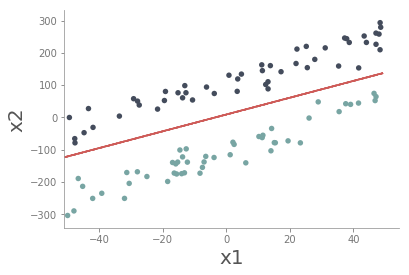

In [4]:
def svm(X, y):
    clf = SVC(C=np.inf, kernel='linear')
    clf.fit(X, y)
    return (clf)

def draw(X, y, clf):
    ###These are to make the figure clearer. You don't need to change this part.
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color('#999999')
    plt.gca().spines['left'].set_color('#999999')
    plt.xlabel('x1', fontsize=20, color='#555555'); plt.ylabel('x2', fontsize=20, color='#555555')
    plt.tick_params(axis='x', colors='#777777')
    plt.tick_params(axis='y', colors='#777777')    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.3  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='#CE5A57', alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c = ['#444C5C' if yy == 1 else '#78A5A3' for yy in y], edgecolor='none', s=30)

    # plt.savefig("simplest_svm.png")
    plt.show()
    
    plt.close()

if __name__ == '__main__':
    X, y = generate_data(100)
    clf = svm(X, y)
    draw(X, y, clf) 